### Regression Analysis of Ecommerce Customer Behavior Dataset (Linear, Lasso, Ridge)


#### Data Cleaning

In [81]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load the dataset
data = pd.read_csv(r'C:\Users\kiyo3001\Desktop\Personal\GITHUB\New folder (2)\retail.csv')
data.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [ ]:
# check column names
data.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter'],
      dtype='object')

In [ ]:
# select relevant features for analysis
df = data[[ 
    'Age',
    'Gender',
    'Country',
    'City',
    'Membership_Years',
    'Login_Frequency',
    'Session_Duration_Avg',
    'Pages_Per_Session',
    'Wishlist_Items',
    'Average_Order_Value',
    'Discount_Usage_Rate',
    'Returns_Rate',
    'Email_Open_Rate',
    'Customer_Service_Calls',
    'Product_Reviews_Written',
    'Social_Media_Engagement_Score',
    'Mobile_App_Usage',
    'Payment_Method_Diversity',
    'Lifetime_Value',
    'Total_Purchases'
]]

In [ ]:
# check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  int64  
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Wishlist_Items                 46000 non-null  float64
 9   Average_Order_Value            50000 non-null  float64
 10  Discount_Usage_Rate            46500 non-null  float64
 11  Returns_Rate                   45509 non-null  float64
 12  Email_Open_Rate                47472 non-null 

In [ ]:
# check for missing values
df.isnull().sum()

Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                3000
Wishlist_Items                   4000
Average_Order_Value                 0
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Lifetime_Value                      0
Total_Purchases                     0
dtype: int64

In [ ]:
# replace empty strings with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# selected columns for analysis
cols = ['Age', 'Session_Duration_Avg', 'Pages_Per_Session', 'Wishlist_Items', 'Discount_Usage_Rate', 'Returns_Rate','Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written','Social_Media_Engagement_Score', 'Mobile_App_Usage', 'Payment_Method_Diversity']

In [ ]:
# calculate skewness for selected columns
skewness = df[cols].skew()
skewness


Age                              0.946678
Session_Duration_Avg             0.400619
Pages_Per_Session                0.390680
Wishlist_Items                   0.944614
Discount_Usage_Rate              0.369334
Returns_Rate                     5.880713
Email_Open_Rate                  0.493762
Customer_Service_Calls           0.441668
Product_Reviews_Written          1.043992
Social_Media_Engagement_Score    0.504877
Mobile_App_Usage                 0.404941
Payment_Method_Diversity         0.606969
dtype: float64

In [ ]:
# impute missing values based on skewness (skewness >0.5 use median, else mean)
# instead of overall mean/median, use group-wise (by Country) mean/median
for col in cols:
    if skewness[col] > 0.5:
        df[col] = df[col].fillna(df.groupby('Country')[col].transform('median'))
    else:
        df[col] = df[col].fillna(df.groupby('Country')[col].transform('mean'))

In [ ]:
# recheck skewness after imputation
skewness = df[cols].skew()
skewness

Age                              0.974894
Session_Duration_Avg             0.414979
Pages_Per_Session                0.402963
Wishlist_Items                   1.007118
Discount_Usage_Rate              0.382975
Returns_Rate                     6.186144
Email_Open_Rate                  0.506833
Customer_Service_Calls           0.442400
Product_Reviews_Written          1.143134
Social_Media_Engagement_Score    0.570154
Mobile_App_Usage                 0.426882
Payment_Method_Diversity         0.665228
dtype: float64

In [ ]:
# final check for missing values    
df.isnull().sum()

Age                              0
Gender                           0
Country                          0
City                             0
Membership_Years                 0
Login_Frequency                  0
Session_Duration_Avg             0
Pages_Per_Session                0
Wishlist_Items                   0
Average_Order_Value              0
Discount_Usage_Rate              0
Returns_Rate                     0
Email_Open_Rate                  0
Customer_Service_Calls           0
Product_Reviews_Written          0
Social_Media_Engagement_Score    0
Mobile_App_Usage                 0
Payment_Method_Diversity         0
Lifetime_Value                   0
Total_Purchases                  0
dtype: int64

In [ ]:
# list of numerical columns
num_cols = ['Age', 'Membership_Years', 'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session', 'Wishlist_Items', 'Average_Order_Value', 'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written', 'Social_Media_Engagement_Score', 'Mobile_App_Usage', 'Payment_Method_Diversity', 'Lifetime_Value', 'Total_Purchases']


In [ ]:
# descriptive statistics for numerical columns
df[num_cols].describe()


,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Wishlist_Items,Average_Order_Value,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Total_Purchases
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,37.788100,2.984009,11.624660,27.660712,8.737797,4.274520,123.117330,41.997484,6.568507,20.937506,5.681841,2.793580,29.153574,19.371475,2.33618,1440.626292,13.111576
std,11.536331,2.059105,7.810657,10.495032,3.663128,3.060573,175.569714,20.612082,5.871608,13.887646,2.671553,2.256482,19.308715,8.935923,1.08465,907.249443,7.017312
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,26.380000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,-13.000000
25%,30.000000,1.400000,6.000000,20.200000,6.200000,2.000000,87.050000,26.500000,3.100000,10.500000,4.000000,1.000000,15.300000,13.200000,2.00000,789.817500,8.000000
50%,38.000000,2.500000,11.000000,27.500000,8.700000,4.000000,112.970000,41.637730,5.400000,20.712761,5.000000,2.000000,27.500000,19.328419,2.00000,1243.415000,12.000000
75%,45.000000,4.000000,17.000000,34.000000,11.000000,6.000000,144.440000,55.560000,8.600000,29.700000,7.000000,4.000000,40.700000,24.600000,3.00000,1874.000000,17.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,28.000000,9666.379178,116.640000,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.00000,8987.240000,128.700000


In [ ]:
# outlier detection using IQR method
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    print(col, ((df[col] < lower) | (df[col] > upper)).sum())

Age 321
Membership_Years 1581
Login_Frequency 309
Session_Duration_Avg 529
Pages_Per_Session 478
Wishlist_Items 858
Average_Order_Value 1005
Discount_Usage_Rate 224
Returns_Rate 1822
Email_Open_Rate 385
Customer_Service_Calls 1185
Product_Reviews_Written 1090
Social_Media_Engagement_Score 676
Mobile_App_Usage 692
Payment_Method_Diversity 2439
Lifetime_Value 1684
Total_Purchases 628


In [ ]:
# calculate skewness for numerical columns
skewness = df[num_cols].skew()
skewness

Age                               0.974894
Membership_Years                  1.136922
Login_Frequency                   0.511945
Session_Duration_Avg              0.414979
Pages_Per_Session                 0.402963
Wishlist_Items                    1.007118
Average_Order_Value              42.363862
Discount_Usage_Rate               0.382975
Returns_Rate                      6.186144
Email_Open_Rate                   0.506833
Customer_Service_Calls            0.442400
Product_Reviews_Written           1.143134
Social_Media_Engagement_Score     0.570154
Mobile_App_Usage                  0.426882
Payment_Method_Diversity          0.665228
Lifetime_Value                    1.447403
Total_Purchases                   2.690117
dtype: float64

In [ ]:
# log transformation for highly skewed columns
log_cols = [
    'Average_Order_Value', 'Returns_Rate', 'Total_Purchases',
    'Lifetime_Value', 'Product_Reviews_Written',
    'Wishlist_Items', 'Membership_Years']


df[log_cols] = df[log_cols].apply(lambda x: np.log1p(x))

C:\Users\kiyo3001\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kiyo3001\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# check negative values after log transformation
(df[log_cols] <= -1).sum()

Average_Order_Value        0
Returns_Rate               0
Total_Purchases            2
Lifetime_Value             0
Product_Reviews_Written    0
Wishlist_Items             0
Membership_Years           0
dtype: int64

In [ ]:
# specifically handle 'Total_Purchases' to ensure no negative values
df['Total_Purchases'] = np.log1p(df['Total_Purchases'].clip(lower=0))

In [ ]:
# recheck negative values after log transformation

(df[log_cols] <= -1).sum()

Average_Order_Value        0
Returns_Rate               0
Total_Purchases            0
Lifetime_Value             0
Product_Reviews_Written    0
Wishlist_Items             0
Membership_Years           0
dtype: int64

In [ ]:
# cap outliers using IQR method for selected columns
cap_cols = [
    'Age', 'Social_Media_Engagement_Score',
    'Payment_Method_Diversity', 'Login_Frequency',
    'Email_Open_Rate'
]

for col in cap_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3-q1
    df[col] = df[col].clip(q1-1.5*iqr, q3+1.5*iqr)


In [ ]:
# calculate skewness for numerical columns
skewness = df[num_cols].skew()
skewness

Age                              0.201973
Membership_Years                 0.018996
Login_Frequency                  0.466052
Session_Duration_Avg             0.414979
Pages_Per_Session                0.402963
Wishlist_Items                  -0.578017
Average_Order_Value              0.530409
Discount_Usage_Rate              0.382975
Returns_Rate                    -0.184175
Email_Open_Rate                  0.446013
Customer_Service_Calls           0.442400
Product_Reviews_Written         -0.302485
Social_Media_Engagement_Score    0.469288
Mobile_App_Usage                 0.426882
Payment_Method_Diversity         0.457931
Lifetime_Value                  -0.668262
Total_Purchases                 -1.150082
dtype: float64

In [ ]:
# since total purhase still has higher skewness(-1.15) clip its lower outliers again
col = 'Total_Purchases'
q1, q3 = df[col].quantile([0.25, 0.75])
iqr = q3 - q1
lower = q1 - 1.5*iqr
df[col] = df[col].clip(lower=lower)


In [ ]:
# recheck skewness after capping
skewness = df[num_cols].skew()
skewness

Age                              0.201973
Membership_Years                 0.018996
Login_Frequency                  0.466052
Session_Duration_Avg             0.414979
Pages_Per_Session                0.402963
Wishlist_Items                  -0.578017
Average_Order_Value              0.530409
Discount_Usage_Rate              0.382975
Returns_Rate                    -0.184175
Email_Open_Rate                  0.446013
Customer_Service_Calls           0.442400
Product_Reviews_Written         -0.302485
Social_Media_Engagement_Score    0.469288
Mobile_App_Usage                 0.426882
Payment_Method_Diversity         0.457931
Lifetime_Value                  -0.668262
Total_Purchases                 -0.670467
dtype: float64

In [65]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Wishlist_Items,Average_Order_Value,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Total_Purchases
0,43.0,Male,France,Marseille,1.360977,14.0,27.4,6.000000,1.386294,4.561427,46.40,1.098612,17.9,9.0,1.609438,16.3,20.8,1.0,6.861010,1.194706
1,36.0,Male,UK,Manchester,0.955511,15.0,42.7,10.300000,0.693147,4.424248,57.96,2.322388,42.8,7.0,1.386294,28.0,23.3,3.0,6.973983,1.391388
2,45.0,Female,Canada,Vancouver,1.360977,10.0,24.8,1.600000,0.693147,5.115115,12.24,2.525729,0.0,4.0,0.693147,27.5,8.8,2.0,7.162979,1.197714
3,56.0,Female,USA,New York,1.280934,10.0,38.4,14.800000,2.302585,4.999440,44.10,1.856298,41.4,2.0,1.791759,78.8,31.0,3.0,7.758726,1.327761
4,35.0,Male,India,Delhi,1.410987,29.0,51.4,8.804691,2.302585,4.957938,25.20,1.871802,37.9,1.0,2.484907,78.8,50.4,4.0,8.020366,1.506640


<Figure size 500x600 with 0 Axes>

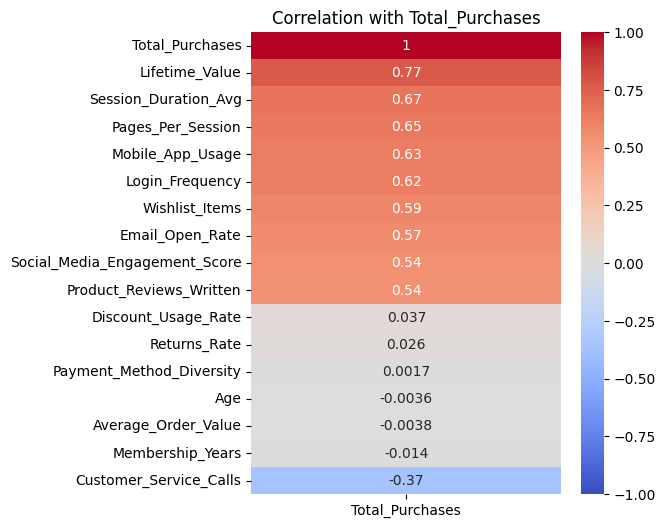

In [ ]:
# correlation analysis with respect to 'Total_Purchases'(Target Variable)
import seaborn as sns
num_df = df.select_dtypes(include=['number'])
corr = num_df.corr()['Total_Purchases'].sort_values(ascending=False)

# heatmap
plt.figure(figsize=(5, 6))
sns.heatmap(
    corr.to_frame(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Correlation with Total_Purchases')
plt.show()


In [ ]:
# removing unnecessary features based on corelation analysis
final_df = df[
    [
        'Age',
        'Gender',
        'Country',
        'City',
        'Session_Duration_Avg',
        'Pages_Per_Session',
        'Mobile_App_Usage',
        'Login_Frequency',
        'Wishlist_Items',
        'Email_Open_Rate',
        'Social_Media_Engagement_Score',
        'Product_Reviews_Written',
        'Customer_Service_Calls',
        'Total_Purchases'
    ]
]

In [ ]:
# save cleaned data to csv
final_df.to_csv('cleaned_retail_data.csv', index=False)